In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno
import sweetviz as sv

# Loading Data

In [2]:
# now read in the functions
from Helpers import read_dataframe



''
******************************
Data Report
******************************
Number of rows:: 1460
Number of columns:: 81


Column Names:: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageAr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Visualizing Missing Values...


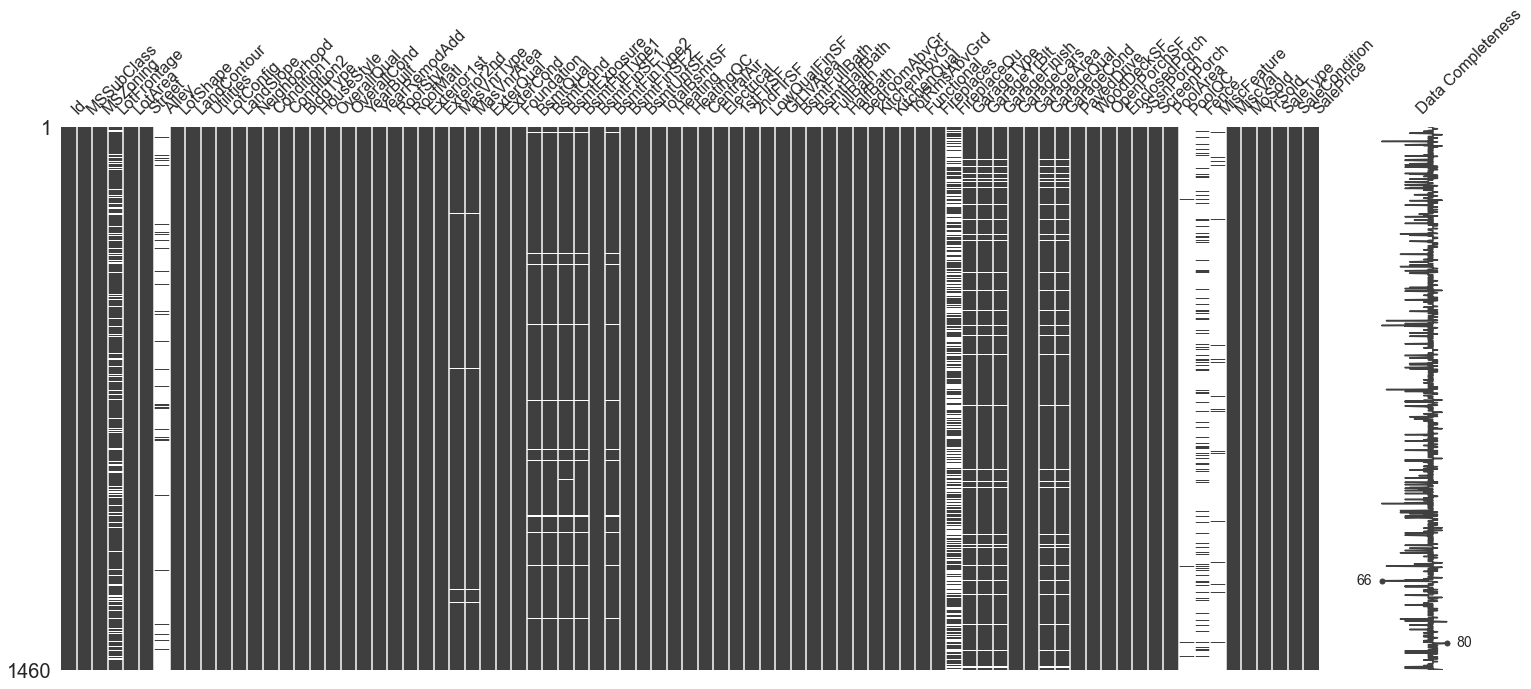

In [3]:
df = read_dataframe(path ='train.csv', analyze = True )

# Data Exploration 

In [4]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
994,995,20,RL,96.0,12456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,337500
884,885,20,RL,65.0,7150,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,100000
59,60,20,RL,60.0,7200,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal,124900
536,537,60,RL,57.0,8924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,188000
77,78,50,RM,50.0,8635,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal,127000


## EDA1 - Duplicates

In [5]:
# Lets check how many record have the same Id number
amount_of_duplicated_Id = df['Id'].duplicated().sum()
print("There are {} Duplicated ID's in the DataFrame".format(amount_of_duplicated_Id))

There are 0 Duplicated ID's in the DataFrame


In [6]:
df.duplicated().any()

False

## EDA2 - Null Values

In [7]:
# Checking how many records have missing values in each feature
df.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

### Notes:
- The features with the highest amount of null values are all related to wealth(pool, fireplace, fence etc...)

## EDA3 - Unique Values

In [8]:
# Importing functions from my Helper Module
from Helpers import extract_cat_features, extract_num_features

In [9]:
# Extracting the categorical and numerical features from the DataFrame
cat_features = extract_cat_features(df)
num_features = extract_num_features(df)

### Unique Categorical Features

In [10]:
# Checking how many unique values there are in each categorical feature
df[cat_features].nunique().sort_values(ascending=False).head(45)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
SaleCondition     6
BsmtFinType2      6
Heating           6
Foundation        6
GarageType        6
RoofStyle         6
BsmtFinType1      6
ExterCond         5
BldgType          5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
FireplaceQu       5
LotShape          4
LandContour       4
MiscFeature       4
Fence             4
BsmtExposure      4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
GarageFinish      3
PavedDrive        3
PoolQC            3
LandSlope         3
Utilities         2
CentralAir        2
Alley             2
Street            2
dtype: int64

#### Notes:

- There are no categories with high cardinallity 


### Unique Numerical Features

In [11]:
# Checking how many unique values there are in each numerical feature
df[num_features].nunique().sort_values(ascending=False).head(40)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
MSSubClass         15
MoSold             12
TotRmsAbvGrd       12
OverallQual        10
OverallCond         9
PoolArea            8
BedroomAbvGr        8
YrSold              5
GarageCars          5
KitchenAbvGr        4
Fireplaces          4
BsmtFullBath        4
FullBath            4
HalfBath            3
BsmtHalfBath        3
dtype: int64

## EDA4 - Target Variable

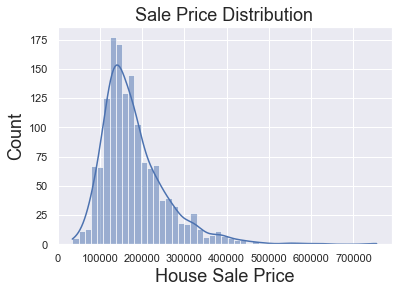

In [12]:
sns.histplot(df['SalePrice'], kde = True)
plt.xlabel('House Sale Price', size = 18)
plt.ylabel('Count', size = 18)
plt.title('Sale Price Distribution', size = 18)
plt.show()

### After Log Transformation

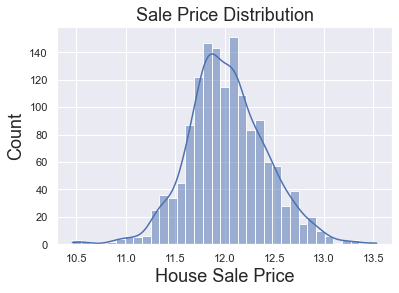

In [13]:
sns.histplot(np.log(df['SalePrice']), kde = True)
plt.xlabel('House Sale Price', size = 18)
plt.ylabel('Count', size = 18)
plt.title('Sale Price Distribution', size = 18)
plt.show()

# Feature Selection - Numerical Features


In [14]:
from Helpers import x_y_split, extract_num_features

In [15]:
x, y = x_y_split(df)

In [16]:
numerical_features = extract_num_features(x)
numerical_df = df.loc[:, numerical_features]

In [17]:
numerical_df = numerical_df.drop('Id', axis = 1)

In [18]:
numerical_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


## Variance

In [19]:
from sklearn.feature_selection import VarianceThreshold
from Helpers import variance_plot

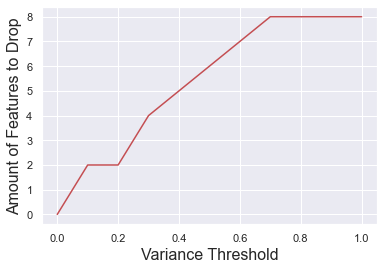

In [20]:
variance_plot(numerical_df)

In [21]:
selector = VarianceThreshold(threshold=0)
selector.fit_transform(numerical_df)

array([[6.000e+01, 6.500e+01, 8.450e+03, ..., 0.000e+00, 2.000e+00,
        2.008e+03],
       [2.000e+01, 8.000e+01, 9.600e+03, ..., 0.000e+00, 5.000e+00,
        2.007e+03],
       [6.000e+01, 6.800e+01, 1.125e+04, ..., 0.000e+00, 9.000e+00,
        2.008e+03],
       ...,
       [7.000e+01, 6.600e+01, 9.042e+03, ..., 2.500e+03, 5.000e+00,
        2.010e+03],
       [2.000e+01, 6.800e+01, 9.717e+03, ..., 0.000e+00, 4.000e+00,
        2.010e+03],
       [2.000e+01, 7.500e+01, 9.937e+03, ..., 0.000e+00, 6.000e+00,
        2.008e+03]])

In [22]:
original_features_list = set(numerical_df.columns.tolist())

In [23]:
features_to_keep = numerical_df.loc[:, selector.get_support()].columns.tolist()
features_to_keep = set(features_to_keep)

In [24]:
features_dropped_var = original_features_list.difference(features_to_keep)
print('The features that did not meet the variance threshold criteria are: \n{}'.format(features_dropped_var))

The features that did not meet the variance threshold criteria are: 
set()


## Constant Features 

In [25]:
from Helpers import constantish_features

In [26]:
features_dropped_const = constantish_features(numerical_df, 0.95)
print('The features that did not meet the constant criteria are: \n{}'.format(features_dropped_const))

The features that did not meet the constant criteria are: 
['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


## Duplicate Features

In [27]:
from Helpers import find_duplicated_columns

In [28]:
find_duplicated_columns(df)

No Duplicate Features


## Correlation

### Dropping highly correlated groups/pairs of features

In [29]:
# now read in the functions
from Helpers import correlation_heatmap, get_pairs, top_abs_corrs, find_duplicated_columns, x_y_split

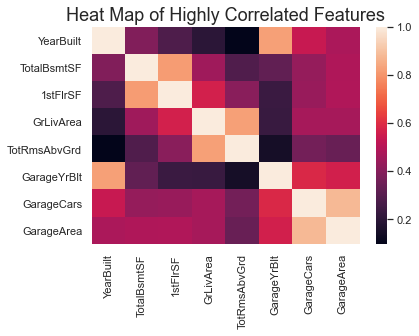

,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
YearBuilt,1.000000,0.391452,0.281986,0.199010,0.095589,0.825667,0.537850,0.478954
TotalBsmtSF,0.391452,1.000000,0.819530,0.454868,0.285573,0.322445,0.434585,0.486665
1stFlrSF,0.281986,0.819530,1.000000,0.566024,0.409516,0.233449,0.439317,0.489782
GrLivArea,0.199010,0.454868,0.566024,1.000000,0.825489,0.231197,0.467247,0.468997
TotRmsAbvGrd,0.095589,0.285573,0.409516,0.825489,1.000000,0.148112,0.362289,0.337822
GarageYrBlt,0.825667,0.322445,0.233449,0.231197,0.148112,1.000000,0.588920,0.564567
GarageCars,0.537850,0.434585,0.439317,0.467247,0.362289,0.588920,1.000000,0.882475
GarageArea,0.478954,0.486665,0.489782,0.468997,0.337822,0.564567,0.882475,1.000000


In [30]:
correlation_heatmap(df)

### Filtering the High Correlation pairs of features

In [31]:
corr_df = top_abs_corrs(df)
corr_df

,feature_1,feature_2,correlation
0,GarageCars,GarageArea,0.882475
1,YearBuilt,GarageYrBlt,0.825667
2,GrLivArea,TotRmsAbvGrd,0.825489
3,TotalBsmtSF,1stFlrSF,0.819530


####  Ill use a RandomForest model to choose the most valuable features of each pair. 


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from Helpers import who_to_drop

In [33]:
features_to_drop_pairs = who_to_drop(corr_df, numerical_df, y)
print('The features to drop from each pair of highly correlated features are:\n{}'.format(features_to_drop_pairs))

The features to drop from each pair of highly correlated features are:
['GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF']


### Dropping low correlated features with the target variable
- Ill define low correlation as an absolute values of less than 0.05

In [34]:
low_corr_dict = dict()

for feature in numerical_df.columns:
    correlation_with_y = abs(y.corr(numerical_df[feature]))
    
    if correlation_with_y <= 0.05:
        low_corr_dict[feature] = correlation_with_y
        
low_corr_set = set(sorted(low_corr_dict.items(), key=lambda low_corr_dict: low_corr_dict[1]))
low_corr_set

{('3SsnPorch', 0.04458366533574843),
 ('BsmtFinSF2', 0.011378121450215137),
 ('BsmtHalfBath', 0.016844154297359012),
 ('LowQualFinSF', 0.025606130000679548),
 ('MiscVal', 0.021189579640303245),
 ('MoSold', 0.04643224522381936),
 ('YrSold', 0.028922585168730284)}

In [35]:
features_to_drop_target = set()
for feature in low_corr_set:
    features_to_drop_target.add(feature[0])
    
features_to_drop_target

{'3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'LowQualFinSF',
 'MiscVal',
 'MoSold',
 'YrSold'}

# Feature Selection - Categorical Features

## Chi-Square

lets define :
- Null Hypothesis- The two *Categorical* variables are independent.
- Alternate Hypothesis- The two *Categorical* variables are dependent.

In [36]:
from sklearn.feature_selection import chi2
from scipy import stats
from Helpers import ChiSquare

In [37]:
c = ChiSquare(df)

In [38]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [39]:
features_to_drop_chi_withP_val = c.features_to_drop('SalePrice')
features_to_drop_chi_withP_val

[('Electrical', 0.055687991437252254),
 ('Condition2', 0.07598640644469955),
 ('LandContour', 0.08674645041917711),
 ('LandSlope', 0.10508638737793802),
 ('GarageType', 0.13248306385029038),
 ('Alley', 0.20972415885759163),
 ('MiscFeature', 0.23779471590496037),
 ('PoolQC', 0.3007082761743609),
 ('HouseStyle', 0.6482615179447816),
 ('Exterior2nd', 0.8469189757654344),
 ('Fence', 0.9141088546261399),
 ('BsmtFinType1', 0.9728950558884568),
 ('PavedDrive', 0.9912799626956016),
 ('HeatingQC', 0.9995946871632676),
 ('Exterior1st', 0.9999839433628513),
 ('GarageCond', 0.999985676535125),
 ('BldgType', 0.9999860714473023),
 ('BsmtFinType2', 0.9999995053342521),
 ('Utilities', 1.0),
 ('Condition1', 1.0),
 ('RoofStyle', 1.0),
 ('RoofMatl', 1.0),
 ('Functional', 1.0)]

## Summary

- Lets combine all the features that did not meet any one of these tests

In [40]:
features_to_drop_chi = set()
for feature in features_to_drop_chi_withP_val:
    features_to_drop_chi.add(feature[0])
    

In [41]:
overall_features_to_drop = features_dropped_var.union(features_dropped_const, features_to_drop_pairs, features_to_drop_target,features_to_drop_chi )
print('The features that did not meet any one of the feature selection tests are: \n{}'.format(overall_features_to_drop))

The features that did not meet any one of the feature selection tests are: 
{'Fence', 'GarageYrBlt', 'BsmtFinType1', 'GarageCond', 'BsmtFinType2', 'PoolQC', 'BsmtFinSF2', 'Exterior2nd', 'MiscFeature', 'LandContour', 'HeatingQC', 'GarageType', 'RoofStyle', 'KitchenAbvGr', 'HouseStyle', 'Condition2', 'Alley', 'Condition1', 'PoolArea', 'Functional', 'PavedDrive', 'GarageCars', 'LowQualFinSF', 'MoSold', '1stFlrSF', 'RoofMatl', 'Electrical', 'Exterior1st', 'TotRmsAbvGrd', 'LandSlope', 'Utilities', 'BsmtHalfBath', 'BldgType', '3SsnPorch', 'YrSold', 'MiscVal'}
